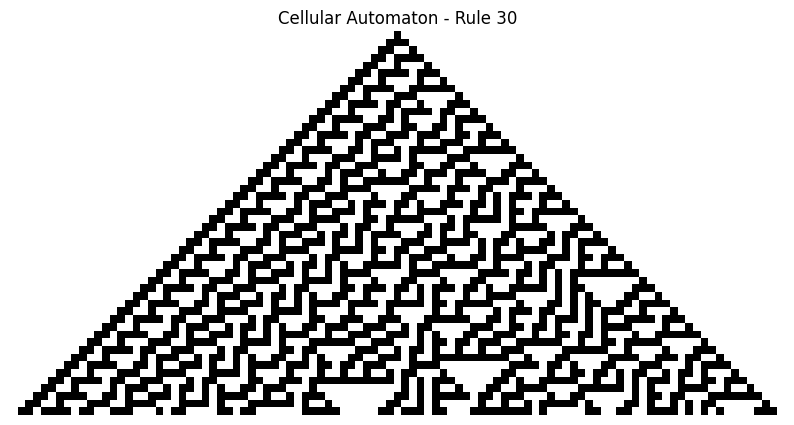

In [ ]:
## This is an example of Cellular Automata, Rule 30.

import numpy as np
import matplotlib.pyplot as plt

def cellular_automaton(rule, size, steps):
    ## Convert rule number to binary (8-bit)
    rule_bin = np.array([int(x) for x in f"{rule:08b}"])

    ## Initialize grid
    grid = np.zeros((steps, size), dtype=int)
    grid[0, size // 2] = 1  # Start with a single cell in the middle

    ## Generate automaton
    for t in range(1, steps):
        for i in range(1, size - 1):
            neighborhood = grid[t - 1, i - 1:i + 2]
            pattern = int("".join(neighborhood.astype(str)), 2)
            grid[t, i] = rule_bin[7 - pattern]

    return grid

## Parameters
rule = 30  ## Rule number (e.g., Rule 30)
size = 101  ## Width of the grid
steps = 50  ## Number of time steps

## Generate and visualize
grid = cellular_automaton(rule, size, steps)
plt.figure(figsize=(10, 6))
plt.imshow(grid, cmap="binary", interpolation="nearest")
plt.title(f"Cellular Automaton - Rule {rule}")
plt.axis("off")
plt.show()

In [ ]:
## Busy Beaver algorithm. Find a way to output a series of 1's before halting.
## Tape length: length of sequence (shown in output).
## Function for Busy Beaver.
class BusyBeaver:
    def __init__(self, states, tape_length=100):
        self.states = states  ## Dictionary of states and transitions
        self.tape = [0] * tape_length  ## Initialize tape with 0s
        self.head = tape_length // 2  ## Start in the middle of the tape
        self.current_state = 'A'  ## Initial state
        self.steps = 0

    def run(self, max_steps=10000):
        while self.current_state != 'HALT' and self.steps < max_steps:
            current_value = self.tape[self.head]
            if self.current_state not in self.states or current_value not in self.states[self.current_state]:
                break  ## Invalid state or transition
            action = self.states[self.current_state][current_value]
            self.tape[self.head] = action['write']
            self.head += action['move']
            self.current_state = action['next']
            self.steps += 1

    def display_tape(self):
        return ''.join(map(str, self.tape))

## States for a two-state Busy Beaver (A and B).
states = {
    'A': {
        0: {'write': 1, 'move': 3, 'next': 'B'},
        1: {'write': 1, 'move': -3, 'next': 'HALT'}
    },
    'B': {
        0: {'write': 1, 'move': -7, 'next': 'A'},
        1: {'write': 1, 'move': 7, 'next': 'HALT'}
    }
}

## Initialize and run the Busy Beaver
bb = BusyBeaver(states)
bb.run()
print(f"Steps: {bb.steps}")
print(f"Tape: {bb.display_tape()}")

Steps: 51
Tape: 0110011001100110011001100110011001100110011001100110011001100110011001100110011001100110011001100110


In [ ]:
## Threading example. Two tasks, executed serially, 1 second per task.
from time import sleep, perf_counter

def task():
    print('Starting a task...')
    sleep(1)
    print('done')


start_time = perf_counter()

task()
task()

end_time = perf_counter()

print(f'It took {end_time- start_time: 0.2f} second(s) to complete.')


Starting a task...
done
Starting a task...
done
It took  2.00 second(s) to complete.


In [ ]:
## Multithreading example. Two tasks, executed in parallel, 1 second for per task, 1 second for both tasks.
from time import sleep, perf_counter
from threading import Thread

def task():
    print('Starting a task...')
    sleep(1)
    print('done')

start_time = perf_counter()

## create two new threads
t1 = Thread(target=task)
t2 = Thread(target=task)

## start the threads
t1.start()
t2.start()

## wait for the threads to complete
t1.join()
t2.join()

end_time = perf_counter()

print(f'It took {end_time- start_time: 0.2f} second(s) to complete.')

Starting a task...
Starting a task...
done
done
It took  1.00 second(s) to complete.


In [ ]:
## Multithreading example. Two tasks, executed in parallel, 1 second for per task, 1 second for both tasks.
from time import sleep, perf_counter
from threading import Thread

def task():
    print('Starting a task...')
    sleep(1)
    print('done')

start_time = perf_counter()

## create two new threads
t1 = Thread(target=task)
t2 = Thread(target=task)
t3 = Thread(target=task)
t4 = Thread(target=task)

## start the threads
t1.start()
t2.start()
t3.start()
t4.start()

## wait for the threads to complete
t1.join()
t2.join()
t3.join()
t4.join()

end_time = perf_counter()

print(f'It took {end_time- start_time: 0.2f} second(s) to complete.')

Starting a task...
Starting a task...
Starting a task...
Starting a task...
done
done
done
done
It took  1.03 second(s) to complete.


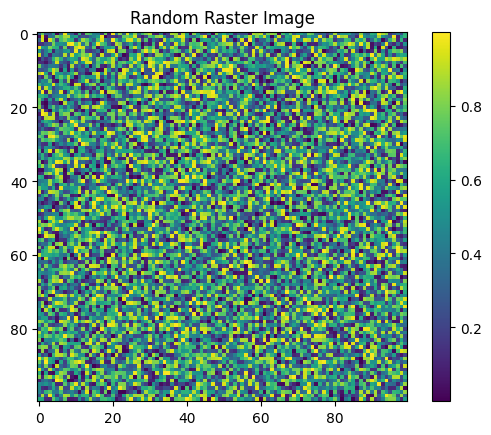

In [ ]:
## Raster graphic generated in Python.

import matplotlib.pyplot as plt
import numpy as np

## Create a random raster image
data = np.random.rand(100, 100)  ## 100x100 grid with random values
plt.imshow(data, cmap='viridis')  ## Display with a colormap
plt.colorbar()
plt.title("Random Raster Image")
plt.show()

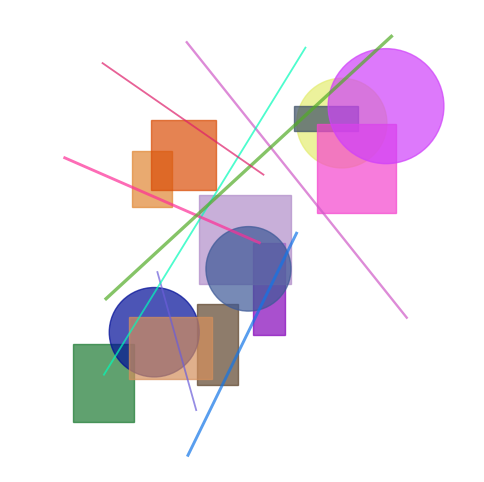

In [ ]:
import matplotlib.pyplot as plt
import random

## Function to generate random colors
def random_color():
    return (random.random(), random.random(), random.random())

## Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

## Set axis limits
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

## Remove axes for a cleaner look
ax.axis('off')

## Generate random shapes
for _ in range(20):  # Adjust the number of shapes
    shape_type = random.choice(['circle', 'rectangle', 'line'])
    color = random_color()

    if shape_type == 'circle':
        x, y = random.uniform(10, 90), random.uniform(10, 90)
        radius = random.uniform(5, 15)
        circle = plt.Circle((x, y), radius, color=color, alpha=0.7)
        ax.add_artist(circle)

    elif shape_type == 'rectangle':
        x, y = random.uniform(10, 80), random.uniform(10, 80)
        width, height = random.uniform(5, 20), random.uniform(5, 20)
        rectangle = plt.Rectangle((x, y), width, height, color=color, alpha=0.7)
        ax.add_artist(rectangle)

    elif shape_type == 'line':
        x1, y1 = random.uniform(0, 100), random.uniform(0, 100)
        x2, y2 = random.uniform(0, 100), random.uniform(0, 100)
        ax.plot([x1, x2], [y1, y2], color=color, linewidth=random.uniform(1, 3), alpha=0.7)

## Show the plot
plt.show()

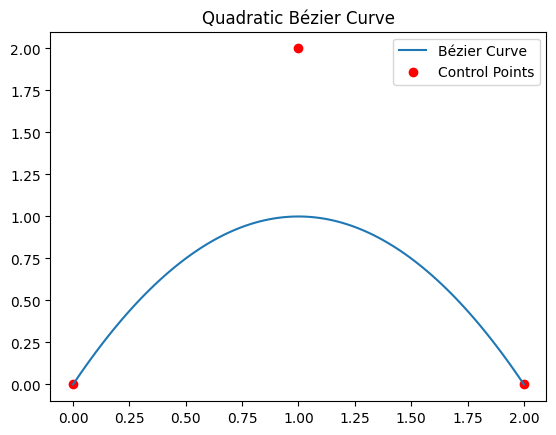

In [ ]:
## Quadratic Bézier Curve

import numpy as np
import matplotlib.pyplot as plt

# Define control points
P0 = np.array([0, 0])
P1 = np.array([1, 2])
P2 = np.array([2, 0])

## Generate the Bézier curve
t = np.linspace(0, 1, 100).reshape(-1, 1)  ## Parameter t from 0 to 1, reshaped for broadcasting
curve = (1 - t)**2 * P0 + 2 * (1 - t) * t * P1 + t**2 * P2

## Plot the curve and control points
plt.plot(curve[:, 0], curve[:, 1], label="Bézier Curve")
plt.scatter([P0[0], P1[0], P2[0]], [P0[1], P1[1], P2[1]], color='red', label="Control Points")
plt.legend()
plt.title("Quadratic Bézier Curve")
plt.show()

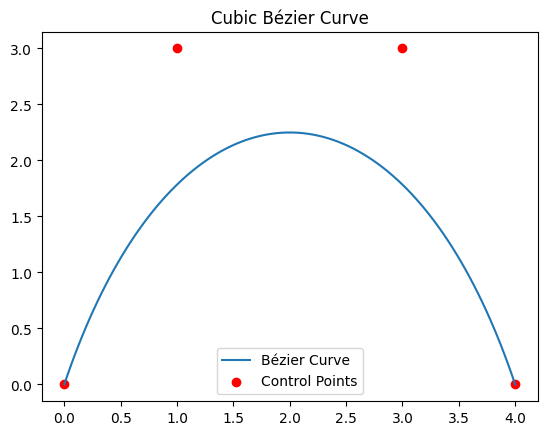

In [ ]:
## Cubic Bézier Curve

import numpy as np
import matplotlib.pyplot as plt

## Define control points
P0 = np.array([0, 0])
P1 = np.array([1, 3])
P2 = np.array([3, 3])
P3 = np.array([4, 0])

## Generate the Bézier curve
t = np.linspace(0, 1, 100).reshape(-1, 1) # Reshape t for broadcasting
curve = (1 - t)**3 * P0 + 3 * (1 - t)**2 * t * P1 + 3 * (1 - t) * t**2 * P2 + t**3 * P3

## Plot the curve and control points
plt.plot(curve[:, 0], curve[:, 1], label="Bézier Curve")
plt.scatter([P0[0], P1[0], P2[0], P3[0]], [P0[1], P1[1], P2[1], P3[1]], color='red', label="Control Points")
plt.legend()
plt.title("Cubic Bézier Curve")
plt.show()

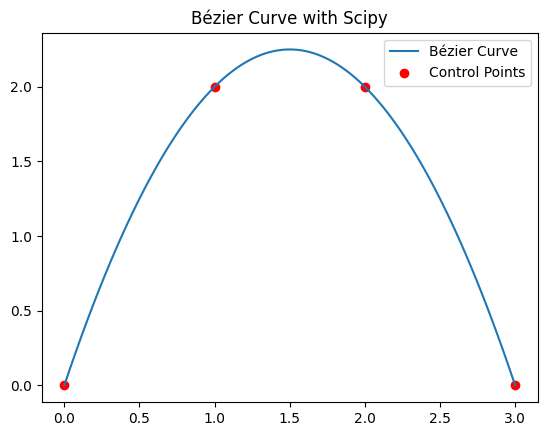

In [ ]:
## Bézier Curves using SciPy

from scipy.interpolate import make_interp_spline
import numpy as np
import matplotlib.pyplot as plt

## Define control points
control_points = np.array([[0, 0], [1, 2], [2, 2], [3, 0]])

## Generate the Bézier curve
t = np.linspace(0, 1, 100)
spl = make_interp_spline(np.linspace(0, 1, len(control_points)), control_points, k=3)
curve = spl(t)

## Plot the curve and control points
plt.plot(curve[:, 0], curve[:, 1], label="Bézier Curve")
plt.scatter(control_points[:, 0], control_points[:, 1], color='red', label="Control Points")
plt.legend()
plt.title("Bézier Curve with Scipy")
plt.show()